In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [2]:
n_samples = 3
x = np.random.rand(n_samples) * 2 - 1
true_m = 2.3
true_n = -0.2
noise_std = 0.3
y = true_m * x + true_n + np.random.randn(n_samples) * noise_std

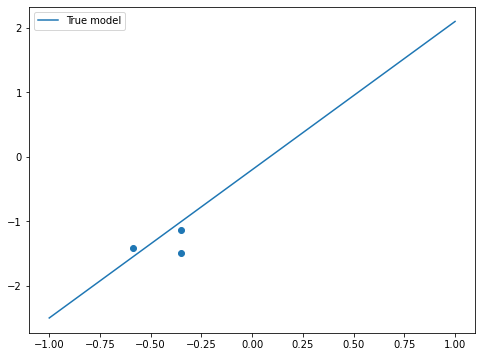

In [3]:
fig = plt.figure(figsize=(8, 6))
fig.set_facecolor('white')
plt.scatter(x, y)

x_lin = np.linspace(-1, 1, 100)
y_model = true_m * x_lin + true_n
plt.plot(x_lin, y_model, label='True model')

plt.legend()

## Prior

In [4]:
w_0 = np.array([0.0, 0.0]).reshape([2, 1])
tau = 4.0
V_0 = tau**2 * np.eye(2)

In [5]:
def prior(m, n):
    pdf = multivariate_normal.pdf(
        np.array([m, n]),
        mean=w_0.flatten(),
        cov=V_0)
    return pdf

m_lin = np.linspace(-10, 10, 90)
n_lin = np.linspace(-10, 10, 110)

m_mesh, n_mesh = np.meshgrid(m_lin, n_lin)
prior_lhood = np.empty((len(n_lin), len(m_lin)))

for i in range(len(n_lin)):
    for j in range(len(m_lin)):
        prior_lhood[i, j] = prior(m_mesh[i, j], n_mesh[i, j])

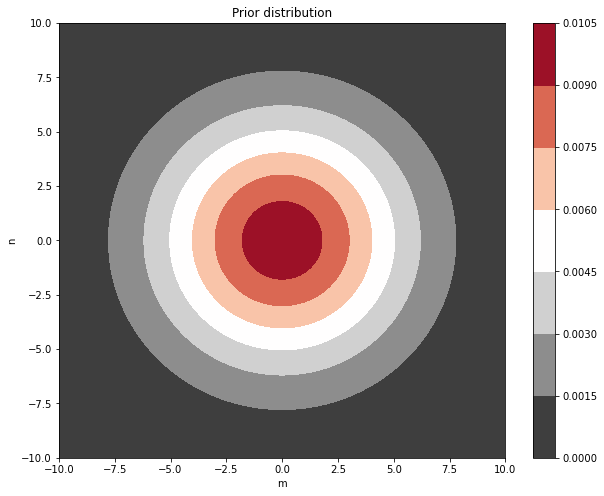

In [6]:
fig = plt.figure(figsize=(10, 8))
fig.set_facecolor('white')
plt.contourf(m_mesh, n_mesh, prior_lhood, cmap='RdGy_r')
plt.xlabel('m')
plt.ylabel('n')
plt.title('Prior distribution')
plt.colorbar()

Text(0.5, 1.0, 'Samples from prior')

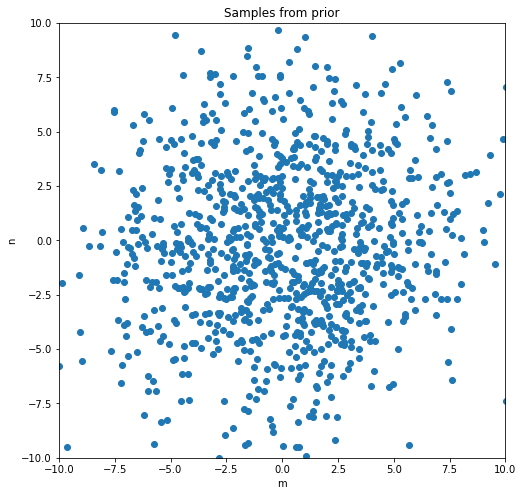

In [7]:
prior_samples = np.random.multivariate_normal(w_0.flatten(), V_0, size=1000)

fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')
plt.scatter(prior_samples[:, 0], prior_samples[:, 1])

plt.axis([-10, 10, -10, 10])
plt.xlabel('m')
plt.ylabel('n')
plt.title('Samples from prior')

## Posterior

In [8]:
extended_x = np.stack([x, np.ones(n_samples)], axis=1)

V_N = noise_std ** 2 * np.linalg.inv(
    noise_std ** 2 * np.linalg.inv(V_0) 
    + np.matmul(extended_x.T, extended_x))
w_N = (np.matmul(np.matmul(V_N, np.linalg.inv(V_0)), w_0) 
       + 1/noise_std**2 * np.matmul(np.matmul(V_N, extended_x.T), y.reshape([-1, 1])))

In [9]:
def posterior(m, n):
    pdf = multivariate_normal.pdf(
        np.array([m, n]),
        mean=w_N.flatten(),
        cov=V_N)
    return pdf

m_lin = np.linspace(-5, 5, 90)
n_lin = np.linspace(-5, 5, 110)

m_mesh, n_mesh = np.meshgrid(m_lin, n_lin)
posterior_lhood = np.empty((len(n_lin), len(m_lin)))

for i in range(len(n_lin)):
    for j in range(len(m_lin)):
        posterior_lhood[i, j] = posterior(m_mesh[i, j], n_mesh[i, j])

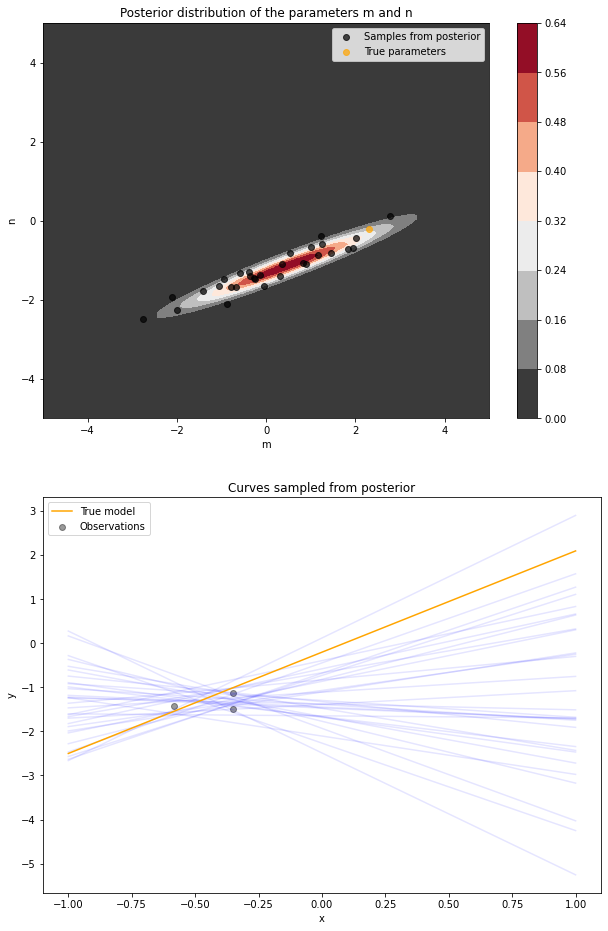

In [10]:
posterior_samples = np.random.multivariate_normal(
    w_N.flatten(), V_N, size=30)

fig = plt.figure(figsize=(10, 16))
fig.set_facecolor('white')

plt.subplot(2, 1, 1)
plt.contourf(m_mesh, n_mesh, posterior_lhood, cmap='RdGy_r')
plt.colorbar()

plt.scatter(
    posterior_samples[:, 0], posterior_samples[:, 1], 
    c='k', alpha=0.7, label='Samples from posterior')
plt.scatter(
    true_m, true_n, 
    c='orange', alpha=0.7, label='True parameters')
plt.axis([-5, 5, -5, 5])
plt.xlabel('m')
plt.ylabel('n')
plt.title('Posterior distribution of the parameters m and n')
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(x, y, alpha=0.4, c='black', label='Observations')

x_lin = np.linspace(-1, 1, 100)
for i in range(len(posterior_samples)):
    y_posterior = posterior_samples[i, 0] * x_lin + posterior_samples[i, 1]
    plt.plot(x_lin, y_posterior, alpha=0.1, c='blue')
    
y_model = true_m * x_lin + true_n
plt.plot(x_lin, y_model, c='orange', label='True model')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curves sampled from posterior')
plt.legend()